In [1]:
import numpy as np
from scipy.fft import fft2, ifft2, fftshift
import matplotlib.pyplot as plt
import cv2

### Implementar la función create_gauss_filter(h, w, k_size, sigma) para crear filtros gaussianos para filtrado espectral. Debe retornar un filtro gaussiano de tamaño HxW en dominio espacial y su transformada de Fourier.

In [2]:
def create_gauss_filter(h, w, k_size, sigma):
    # Crear el kernel gaussiano en el dominio espacial
    kernel = cv2.getGaussianKernel(k_size, sigma)
    kernel = kernel @ kernel.T  # Para hacer el kernel 2D
    
    k_height, k_width = kernel.shape
    # Calcular el relleno necesario para cada dimensión
    pad_h = h - k_height
    pad_w = w - k_width
    
    # Dividir el relleno en partes iguales a ambos lados del kernel
    pad_h_top = pad_h // 2
    pad_h_bottom = pad_h - pad_h_top
    
    pad_w_left = pad_w // 2
    pad_w_right = pad_w - pad_w_left
    
    # Agregar el relleno de ceros al kernel
    padded_kernel = np.pad(kernel, ((pad_h_top, pad_h_bottom), (pad_w_left, pad_w_right)), mode='constant')
    # Aplicar la transformada de Fourier al kernel
    fft_kernel = fft2(padded_kernel)

    return padded_kernel, fft_kernel

In [3]:
h = 256
w = 256
k_size = 15
sigma = 3.0

spatial_kernel, fourier_kernel = create_gauss_filter(h, w, k_size, sigma)
spatial_kernel, fourier_kernel

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[ 1.        -0.00000000e+00j, -0.99722829-2.44805803e-02j,
          0.98895422+4.85842052e-02j, ..., -0.97530012+7.19424589e-02j,
          0.98895422-4.85842052e-02j, -0.99722829+2.44805803e-02j],
        [-0.99722829-2.44805803e-02j,  0.99386496+4.88254543e-02j,
         -0.98502375-7.26597168e-02j, ...,  0.97435806-4.78671420e-02j,
         -0.98740249+2.42393705e-02j,  0.99506355-3.57786717e-17j],
        [ 0.98895422+4.85842052e-02j, -0.98502375-7.26597168e-02j,
          0.97567002+9.60951091e-02j, ..., -0.96802243+2.37636169e-02j,
          0.98039087-2.25514052e-17j, -0.98740249-2.42393705e-02j],
        ...,
        [-0.97530012+7.19424589e-02j,  0.97435806-4.78671420e-02j,
         -0.96802243+2.37636169e-02j, ...,  0.9460

### 1. Graficar ambas representaciones para diferentes tamaños de kernel y sigma. Aplicar el filtro una imagen para validar el funcionamiento en el dominio espectral.

In [4]:
def apply_filter(image, filter_fft):
    filtered_image = np.zeros_like(image)
    for channel in range(image.shape[2]):
        image_channel = image[:, :, channel]
        image_channel_fft = fft2(image_channel)
        filtered_channel_fft = image_channel_fft * filter_fft
        filtered_channel = fftshift(np.abs(ifft2((filtered_channel_fft))))
        filtered_image[:, :, channel] = filtered_channel
    return filtered_image

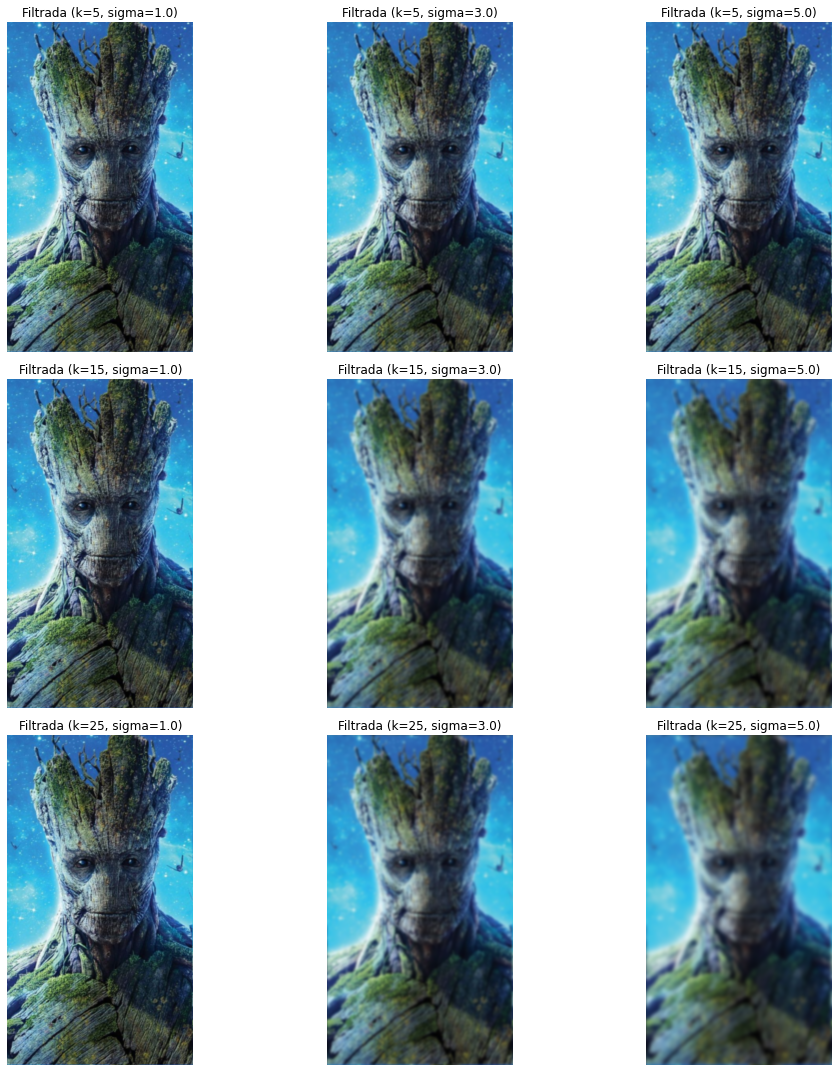

In [5]:
# Cargar la imagen
# https://i.pinimg.com/474x/5b/33/7c/5b337cebee48b24bdef371ac84fe2838.jpg
ruta_imagen = "marvel_groot.jpg"

img_orig = cv2.imread(ruta_imagen)
# Convertirla a RGB
imagen = cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB)

# Parámetros para tamaños de kernel y sigma
tamanios_kernel = [5, 15, 25]
sigmas = [1.0, 3.0, 5.0]

# Crear representaciones y aplicar el filtro para diferentes configuraciones
plt.figure(figsize=(15, 15))
for i, tamanio_kernel in enumerate(tamanios_kernel):
    for j, sigma in enumerate(sigmas):
        plt.subplot(len(tamanios_kernel), len(sigmas), i * len(sigmas) + j + 1)
        
        # Crear y aplicar el filtro
        kernel_relleno, fft_kernel = create_gauss_filter(imagen.shape[0], imagen.shape[1], tamanio_kernel, sigma)
        imagen_filtrada = apply_filter(imagen, fft_kernel)
        
        plt.imshow(imagen_filtrada)
        plt.title(f"Filtrada (k={tamanio_kernel}, sigma={sigma})")
        plt.axis('off')
        
plt.tight_layout()
plt.show()

### 2. Usando el método descripto en el paper “Image Sharpness Measure for Blurred Images in Frequency Domain” comparar el resultado de un filtrado por convolución con el filtrado espectral.

### 3. Repetir la comparación usando uno de los métodos descriptos en el apéndice del paper “Analysis of focus measure operators in shape-from-focus”.